In [18]:
import pandas as pd
print("Codespaces fonctionne !") #test

Codespaces fonctionne !


In [19]:
pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import os
os.chdir('/workspaces/projet-iadata')  # Change le répertoire vers la racine
print(os.getcwd()) 

/workspaces/projet-iadata


### LECTURE DU FICHIER

In [21]:
# Lecture de fichier
file_path='./data/brut/population.xlsx'
print(file_path)

./data/brut/population.xlsx


In [22]:
population = pd.read_excel(file_path)
print(population.head())
print(population.columns)

   objectid  reg dep    cv codgeo                 libgeo  p13_pop  p14_pop  \
0    115658   52  85  8502  85062            Châteauneuf    968.0    993.0   
1    115659   26  58  5808  58300                   Urzy   1839.0   1835.0   
2    115660   43  70  7012  70137  Chassey-lès-Montbozon    218.0    217.0   
3    115661   21  51  5123  51649      Vitry-le-François  13174.0  13144.0   
4    115662   11  78  7811  78638         Vaux-sur-Seine   4749.0   4715.0   

   p15_pop  p16_pop  p17_pop  p18_pop  p19_pop  p20_pop  p21_pop  
0   1013.0   1027.0     1056   1085.0   1114.0   1118.0   1134.0  
1   1828.0   1802.0     1775   1749.0   1746.0   1747.0   1742.0  
2    216.0    215.0      217    215.0    215.0    220.0    225.0  
3  12805.0  12552.0    12133  11743.0  11376.0  11458.0  11454.0  
4   4788.0   4857.0     4927   4929.0   5010.0   5020.0   5083.0  
Index(['objectid', 'reg', 'dep', 'cv', 'codgeo', 'libgeo', 'p13_pop',
       'p14_pop', 'p15_pop', 'p16_pop', 'p17_pop', 'p18_pop

In [23]:
# Conversion de la colonne 'date' en datetime
# Filtrer pour garder uniquement Toulouse
population_toulouse = population[population['libgeo'].str.contains("Toulouse", case=False, na=False)]
print(population_toulouse)
print(population.columns)


       objectid  reg dep    cv codgeo               libgeo   p13_pop  \
4834     131420   43  39  3903  39533  Toulouse-le-Château     216.0   
30741    114579   73  31  3199  31555             Toulouse  458298.0   
33844    115173   73  31  3104  31575     Vieille-Toulouse    1147.0   

        p14_pop   p15_pop   p16_pop  p17_pop   p18_pop   p19_pop   p20_pop  \
4834      216.0     217.0     221.0      221     219.0     217.0     215.0   
30741  466297.0  471941.0  475438.0   479553  486828.0  493465.0  498003.0   
33844    1142.0    1151.0    1160.0     1169    1170.0    1168.0    1211.0   

        p21_pop  
4834      213.0  
30741  504078.0  
33844    1217.0  
Index(['objectid', 'reg', 'dep', 'cv', 'codgeo', 'libgeo', 'p13_pop',
       'p14_pop', 'p15_pop', 'p16_pop', 'p17_pop', 'p18_pop', 'p19_pop',
       'p20_pop', 'p21_pop'],
      dtype='object')


In [24]:
# Voir toutes les communes disponibles
print(population['libgeo'].unique())


['Châteauneuf' 'Urzy' 'Chassey-lès-Montbozon' ... 'Febvin-Palfart'
 'Luchapt' 'La Roche-Chalais']


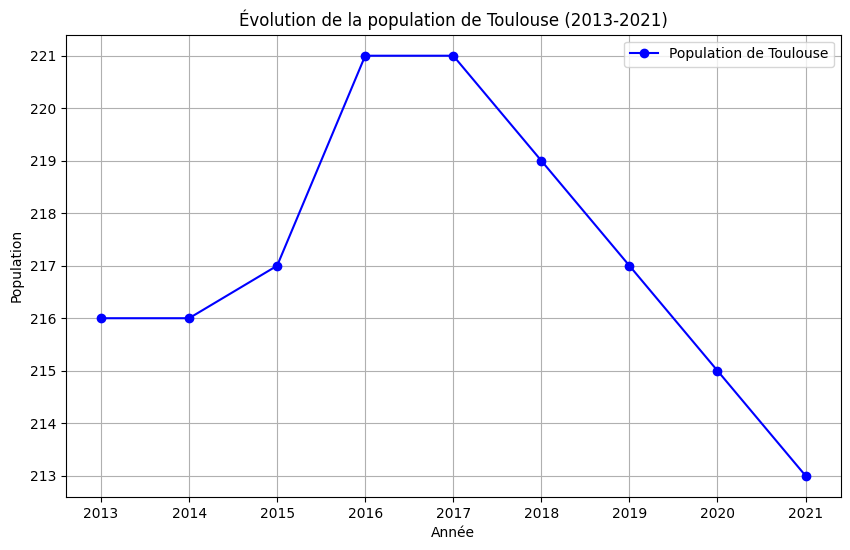

In [25]:
# Préparer les données pour le graphe
years = list(range(2013, 2022))  # Années couvertes
population_values = population_toulouse.iloc[0, 6:].values  # Colonnes de pop_2013 à pop_2021

# Tracer le graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years, population_values, marker='o', label='Population de Toulouse', color='blue')
plt.xlabel('Année')
plt.ylabel('Population')
plt.title("Évolution de la population de Toulouse (2013-2021)")
plt.grid()
plt.legend()
plt.show()


In [26]:
# Sauvegarde du fichier nettoyé
output_path = './data/prepared/popu_clean.xlsx'
population_toulouse.to_csv(output_path, index=False)
print(f"Dataset nettoyé et renommé sauvegardé dans {output_path}")

Dataset nettoyé et renommé sauvegardé dans ./data/prepared/popu_clean.xlsx
